# **Set up the environement**
install all we need ...........

In [ ]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# NLP Text Libraries
import string
import re

# text cleaning
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Feature Extraction Libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

# Classifier Model libraries
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Performance Matrix libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# other
import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# ***Data collection***

In [ ]:
#loading dataset
df = pd.read_csv('emotion_dataset.csv')
df

,Emotion,Text
0,anger,i feel nor heartless is what i am getting
1,anger,i read out of order i feel a bit dissatisfied ...
2,anger,i is a little dark and sometimes i feel very r...
3,anger,i feel so enraged because i was trying to not ...
4,anger,i feel rock and roll is dangerous
...,...,...
63251,surprise,"Some people that tweeted me minutes ago, will ..."
63252,surprise,i cannot keep it on for very long as sometimes...
63253,surprise,im feeling a little dazed at the amount of ite...
63254,surprise,i see it happen in reality i feel thoroughly i...


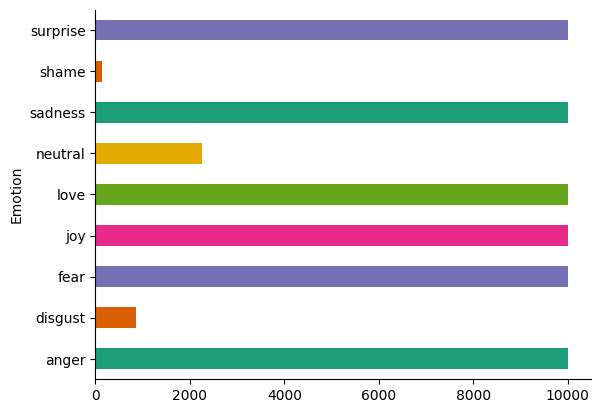

In [ ]:
# @title Emotion

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#**EDA**
Visualizing the dataset using techniques like histograms, scatter plots, box plots, heatmaps, and other charts to Explore Main Characteristics asdata distribution  and summary statistics.::

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63256 entries, 0 to 63255
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  63256 non-null  object
 1   Text     63256 non-null  object
dtypes: object(2)
memory usage: 988.5+ KB


In [ ]:
df.shape

(63256, 2)

<Axes: title={'center': 'Emotion Distribution'}, xlabel='Emotion', ylabel='count'>

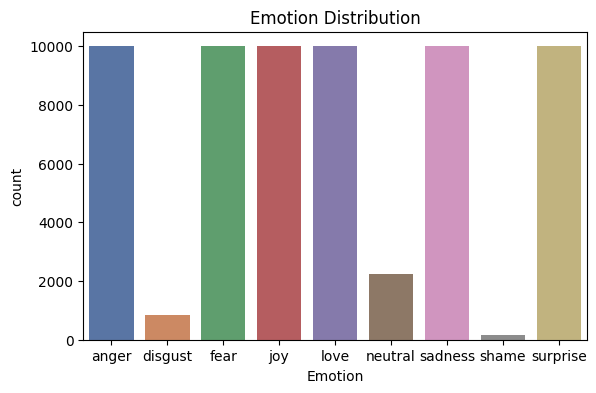

In [ ]:
plt.figure(figsize=(6.5,4))
plt.title('Emotion Distribution')
sns.countplot(x = 'Emotion', data = df , palette='deep')# deep veridis

In [ ]:
df['Emotion'].value_counts()

,count
Emotion,
anger,10000
fear,10000
joy,10000
love,10000
sadness,10000
surprise,10000
neutral,2254
disgust,856
shame,146


In [ ]:
#drop  some emotion category
df.drop(df[df['Emotion'] == 'shame'].index, inplace=True)
df.drop(df[df['Emotion'] == 'disgust'].index, inplace=True)
df.drop(df[df['Emotion'] == 'neutral'].index, inplace=True)
df.drop(df[df['Emotion'] == 'love'].index, inplace=True)

<Axes: xlabel='Emotion', ylabel='count'>

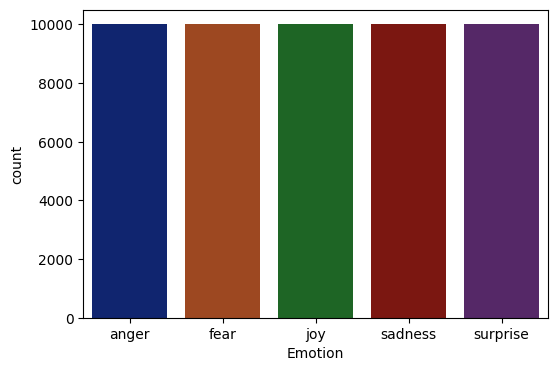

In [ ]:
#visualise the data  after!!!
plt.figure(figsize=(6,4))
sns.countplot(x = 'Emotion', data = df, palette = 'dark')# deep veridis

# **data/Text Preprocessing:**
  **1_  Data Preprocessing**

   1. Remove null-values and duplicate values


   **2_ Text Preprocessing**
2. Remove punctuations tags links ...
3. Tokenization - Converting a sentence into list of words
4. Remove stopwords
5. Lammetization/stemming - Tranforming any form of a word to its root word


# **Data preprocessing**

In [ ]:
df.any().isnull()

,0
Emotion,False
Text,False


In [ ]:
df.isnull().sum()

,0
Emotion,0
Text,0


In [ ]:
df.duplicated().sum()

439

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(49561, 2)

In [ ]:
df['Emotion'].value_counts()

,count
Emotion,
joy,9972
sadness,9966
anger,9939
fear,9857
surprise,9827


<Axes: xlabel='Emotion', ylabel='count'>

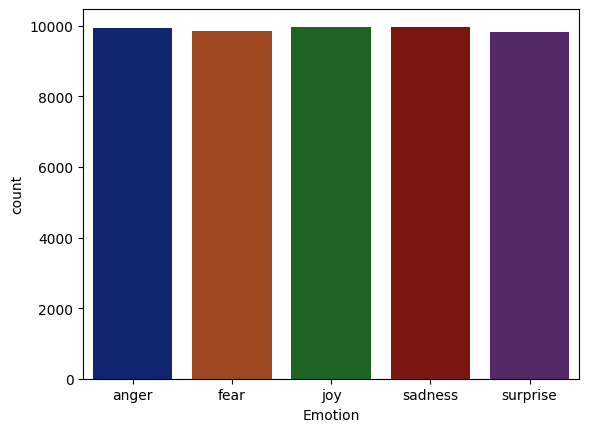

In [ ]:
sns.countplot(x = 'Emotion', data = df, palette = 'dark')

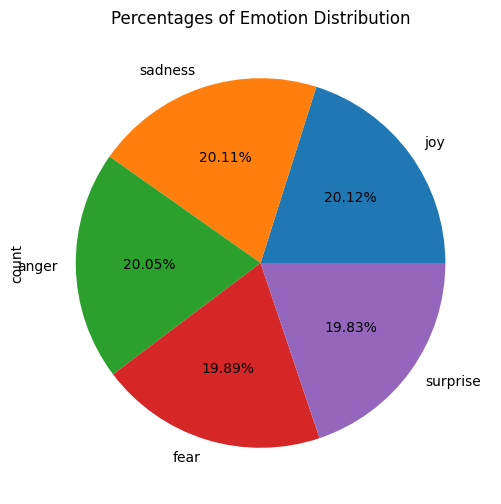

In [ ]:
# Plot pie chart

df.Emotion.value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(6,6))
plt.title("Percentages of Emotion Distribution", loc = "center")
plt.show()


# **Text preprocessing**

**Text Cleaning**

In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 8.0 MB/s eta 0:00:00


In [ ]:
import emoji
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Custom list of unwanted words
unwanted_words = {'target', 'blank', 'http', 'www', 'src', 'img'}


def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|href\S+|@\w+|#\w+', '', text)
    text = re.sub(r'\d+', '', text)
    text = emoji.demojize(text, delimiters=(" ", " "))
    text = ' '.join([word for word in text.split() if word not in unwanted_words])
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    #keep the words like  or not
    tokens = [word for word in tokens if word not in stop_words or word in {"not", "no"}]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    cleaned_text = ' '.join(tokens)

    return cleaned_text


In [ ]:
def handle_negations(text):
    negations = {"not happy": "sad", "not sad": "happy", "not angry": "normal"}
    for phrase, replacement in negations.items():
        text = re.sub(phrase, replacement, text, flags=re.IGNORECASE)
    return text

In [ ]:
# test_text = "I am not happy, but he gives me joy."
# print(handle_negations(test_text))

I am sad, but he gives me joy.


**Applying The Function**

In [ ]:
df['Clean_Text'] = df['Text'].apply(clean_text)


In [ ]:
df['Clean_Text'] = df['Clean_Text'].apply(handle_negations)

In [ ]:
df

,Emotion,Text,Clean_Text
0,anger,i feel nor heartless is what i am getting,feel heartless getting
1,anger,i read out of order i feel a bit dissatisfied ...,read order feel bit dissatisfied like im missi...
2,anger,i is a little dark and sometimes i feel very r...,little dark sometimes feel rude flashing camer...
3,anger,i feel so enraged because i was trying to not ...,feel enraged trying not show victim
4,anger,i feel rock and roll is dangerous,feel rock roll dangerous
...,...,...,...
63251,surprise,"Some people that tweeted me minutes ago, will ...",people tweeted minute ago new video youtube
63252,surprise,i cannot keep it on for very long as sometimes...,not keep long sometimes start feel abit funny ...
63253,surprise,im feeling a little dazed at the amount of ite...,im feeling little dazed amount item no longer ...
63254,surprise,i see it happen in reality i feel thoroughly i...,see happen reality feel thoroughly impressed l...


# **Token Frequency in a sentence after preprocessing**

In [ ]:
df['Emotion'].unique()

array(['anger', 'fear', 'joy', 'sadness', 'surprise'], dtype=object)

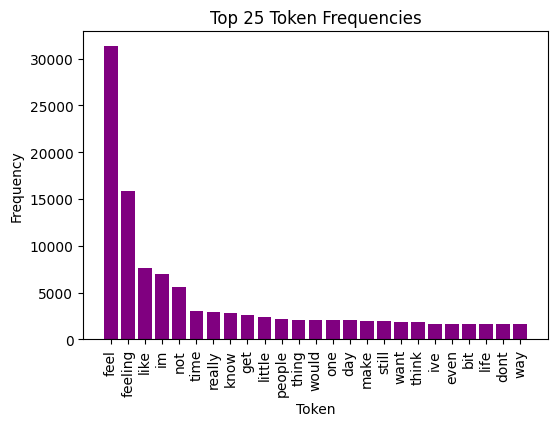

In [ ]:
from collections import Counter
import re


tokens = ' '.join(df['Clean_Text']).split()
token_counts = Counter(tokens)
token_freq_df = pd.DataFrame(token_counts.items(), columns=['Token', 'Frequency'])
token_freq_df = token_freq_df.sort_values(by='Frequency', ascending=False)
token_freq_df.reset_index(drop=True, inplace=True)


top_tokens = token_freq_df.head(25)
plt.figure(figsize=(6, 4))
plt.bar(top_tokens['Token'], top_tokens['Frequency'], color='purple')
plt.xticks(rotation=90)
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.title('Top 25 Token Frequencies')
plt.show()


In [ ]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 7.3 MB/s eta 0:00:00


# **Display wordCloud  for each emotion**

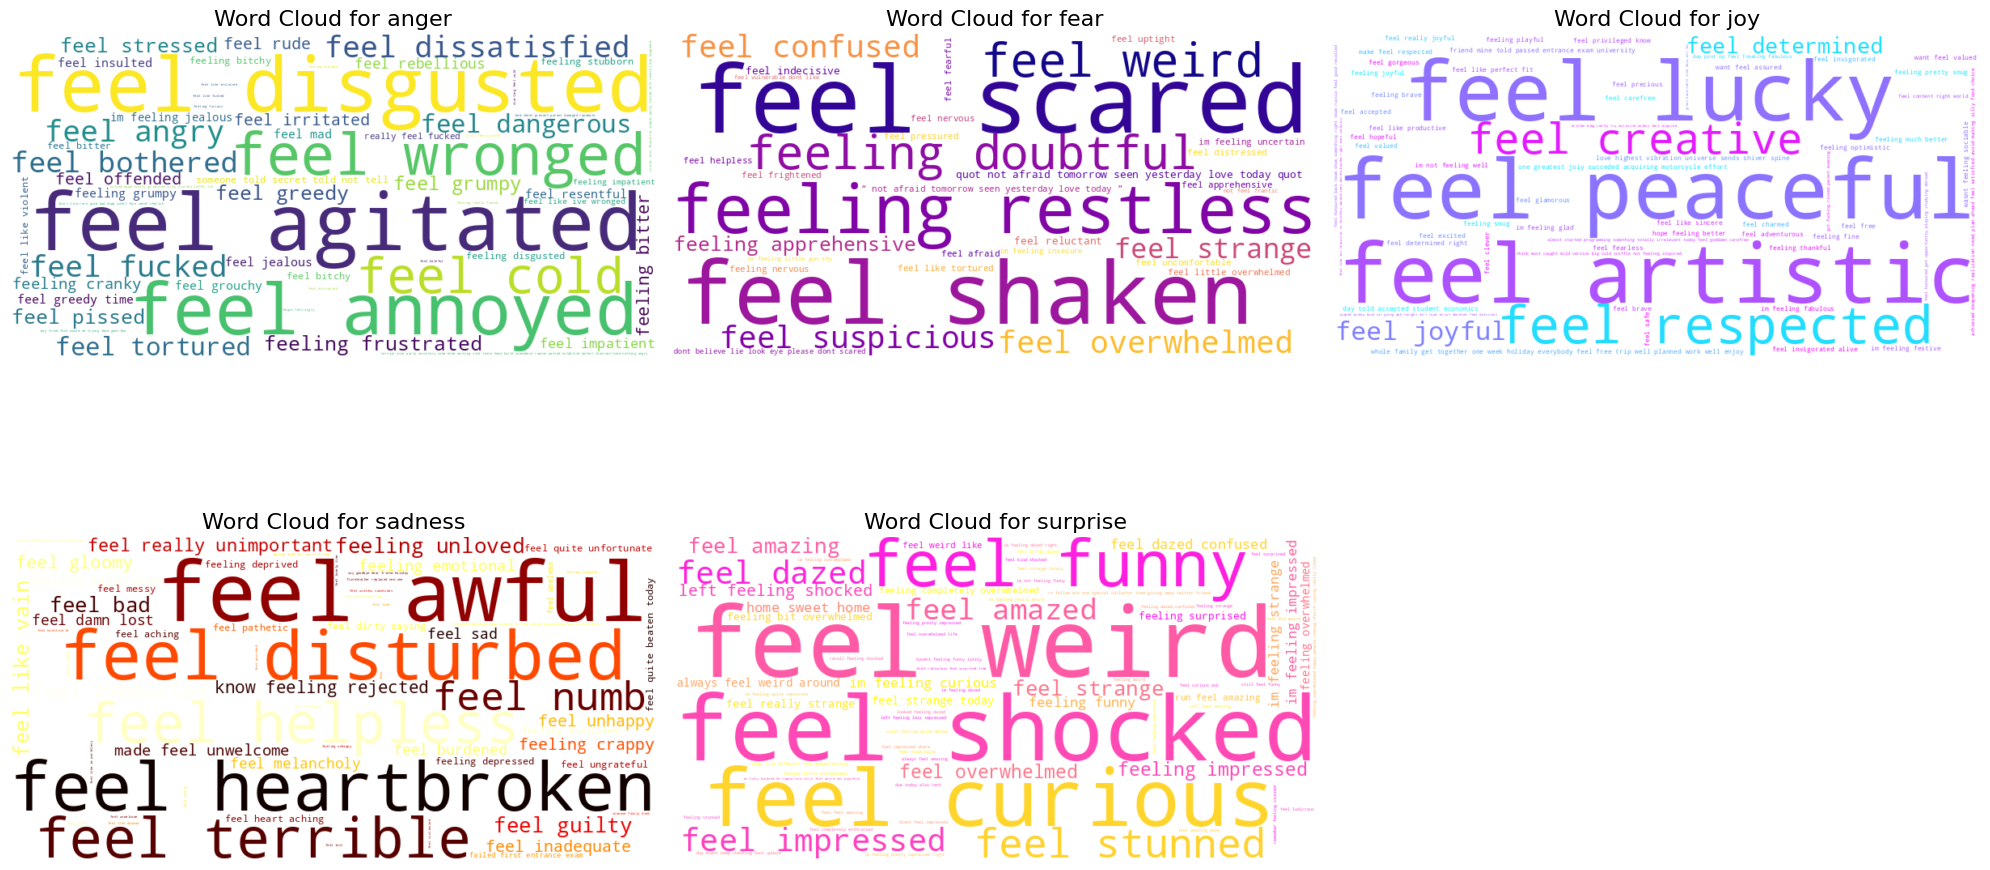

In [ ]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.gridspec as gridspec

word_frequencies = {}
for emotion in df['Emotion'].unique():
    words = df[df['Emotion'] == emotion]['Clean_Text'].explode()
    word_frequencies[emotion] = Counter(words)

fig = plt.figure(figsize=(20, 11))
gs = gridspec.GridSpec(2, 3, figure=fig)
color_maps = ["viridis", "plasma", "cool", "hot", "spring", "winter","plasma"]

for i, (emotion, freq) in enumerate(word_frequencies.items()):
    ax = fig.add_subplot(gs[i])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=color_maps[i % len(color_maps)]).generate_from_frequencies(freq)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Word Cloud for {emotion}", fontsize=16)
    ax.axis('off')
plt.tight_layout()

plt.show()


# **N-Gram Analysis**
**N-Gram Function**

In [ ]:
from nltk.util import ngrams
from collections import Counter
from nltk.corpus import stopwords

def generate_ngrams(text,gram,n):
  Vectorizer = CountVectorizer(stop_words = 'english', ngram_range=(gram,gram))
  ngrams = Vectorizer.fit_transform(text)
  Count = ngrams.sum(axis=0)
  words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]
  words = sorted(words, key = lambda x:x[1], reverse = True)

  return words[:n]

In [ ]:
# Use dropna() so the base DataFrame is not affected
Joy = df[df["Emotion"] == "joy"].dropna()
Sadness =df[df["Emotion"] == "sadness"].dropna()
Surprise = df[df["Emotion"] == "surprise"].dropna()
Anger = df[df["Emotion"] == "anger"].dropna()


In [ ]:
pip install nltk


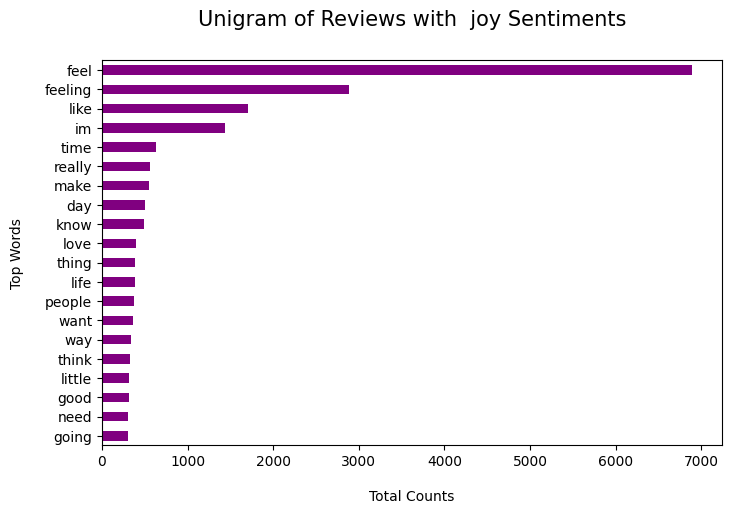

In [ ]:

words = generate_ngrams(Joy['Clean_Text'], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "purple", figsize = (8, 5))
plt.title("Unigram of Reviews with  joy Sentiments", loc = "center", fontsize = 15, color = "black", pad = 25)
plt.xlabel("Total Counts", color = "black", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "black", fontsize = 10, labelpad = 15)
plt.show()



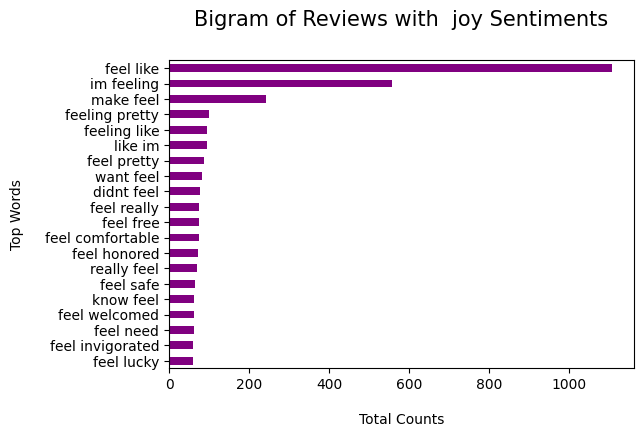

In [ ]:
words = generate_ngrams(Joy['Clean_Text'], 2, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "Purple", figsize = (6, 4))
plt.title("Bigram of Reviews with  joy Sentiments", loc = "center", fontsize = 15, color = "Black", pad = 25)
plt.xlabel("Total Counts", color = "black", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "black", fontsize = 10, labelpad = 15)
plt.show()

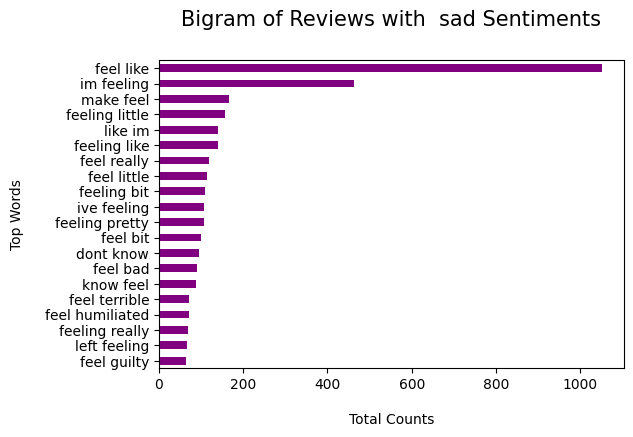

In [ ]:
words = generate_ngrams(Sadness['Clean_Text'], 2, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "purple", figsize = (6, 4))
plt.title("Bigram of Reviews with  sad Sentiments", loc = "center", fontsize = 15, color = "black", pad = 25)
plt.xlabel("Total Counts", color = "black", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "black", fontsize = 10, labelpad = 15)
plt.show()

**vectorizer our data using tfidf  **

In [ ]:

TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (1,1))
X = TF_IDF.fit_transform(df['Clean_Text'])

In [ ]:
y = df['Emotion']

In [ ]:
Counter(y)

Counter({'anger': 9939,
         'fear': 9857,
         'joy': 9972,
         'sadness': 9966,
         'surprise': 9827})

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X ,y ,test_size=0.2,random_state=42)

# **Model selection**
Here we test a differens model to see the one with high_score
and we see that svm and logistic regression have the  high occuracy
so wen can do here  the grid search to find the best hyperparametrs
for the tow of them.


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


DTree = DecisionTreeClassifier()
LogReg = LogisticRegression()
RForest = RandomForestClassifier()
gr_boost = GradientBoostingClassifier()
svm = SGDClassifier()


Models = [DTree, LogReg, RForest, gr_boost, svm]
Models_Dict = {0: "Decision Tree", 1: "Logistic Regression", 2: "Random Forest", 3: "GradientBoosting", 4: "Svm"}

for i, model in enumerate(Models):
  print("{} Test Accuracy: {}".format(Models_Dict[i], cross_val_score(model, X, y, cv = 6, scoring = "accuracy").mean()))

KeyboardInterrupt: 

#**1. Logistic regression**
GridSearchCv to find the best hyperparametr for our model to get the best occuracvy  ...........

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

Param = {"C": np.logspace(-4, 4, 50), "penalty": ['l1', 'l2']}
grid_search = GridSearchCV(estimator = LogisticRegression(random_state = 42), param_grid = Param, scoring = "accuracy", cv = 10, verbose = 0, n_jobs = -1)

grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 87.81 %
Best Parameters: {'C': 1.2067926406393288, 'penalty': 'l2'}


In [ ]:
lr = LogisticRegression(random_state = 42, C=1.2067926406393288, penalty = 'l2')
lr.fit(x_train, y_train)
Prediction = lr.predict(x_test)

In [ ]:
lr_acc =accuracy_score(y_test, Prediction)
print('Accuracy:', '{0:.3f}'.format(lr_acc*100))
# accuracy_score(y_train, lr.predict(x_train))


Accuracy: 88.201


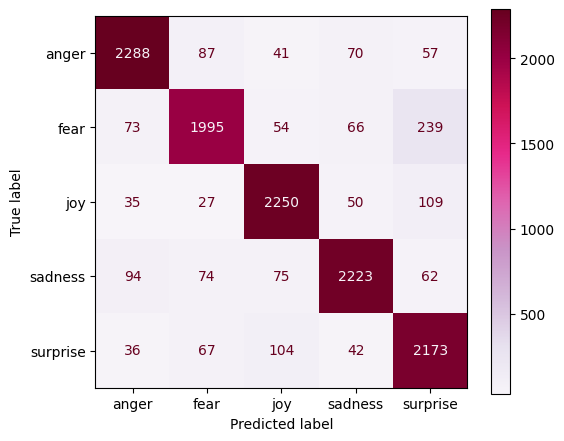

In [ ]:
#confusion matrix for logi reg
lr_cm = confusion_matrix(y_test,Prediction)
cm_display_lr = ConfusionMatrixDisplay(lr_cm, display_labels=lr.classes_)
fig, ax = plt.subplots(figsize=(6,5)) # adjust the size
cm_display_lr.plot(ax=ax,cmap='PuRd')

# **2.Support Vector Machine (SVM)**

In [ ]:
svm = SGDClassifier()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
accuracy_score(y_pred, y_test)

0.8888328457580954

In [ ]:
accuracy_score(y_train, svm.predict(x_train))

0.9075363196125908

In [ ]:
svm_acc = accuracy_score(y_pred, y_test)
svm_prec = precision_score(y_test, y_pred, average='macro')
svm_recal = recall_score(y_test, y_pred, average='macro')
svm_cm = confusion_matrix(y_test,y_pred)
svm_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(svm_acc*100))
print('Precision:', '{0:.3f}'.format(svm_prec*100))
print('Recall:', '{0:.3f}'.format(svm_recal*100))
print('F1-score:', '{0:.3f}'.format(svm_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 88.883
Precision: 88.947
Recall: 88.859
F1-score: 88.852
              precision    recall  f1-score   support

       anger       0.92      0.90      0.91      2036
        fear       0.89      0.84      0.87      1933
         joy       0.89      0.91      0.90      1994
     sadness       0.91      0.89      0.90      2018
    surprise       0.83      0.90      0.87      1932

    accuracy                           0.89      9913
   macro avg       0.89      0.89      0.89      9913
weighted avg       0.89      0.89      0.89      9913



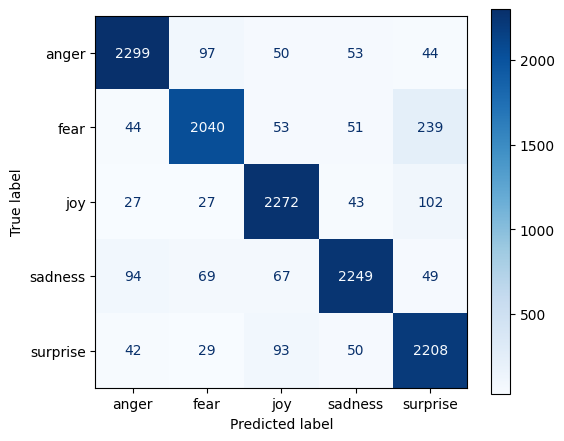

In [ ]:
svm_cm = confusion_matrix(y_test,y_pred)
cm_display_svm = ConfusionMatrixDisplay(svm_cm, display_labels=svm.classes_)
fig, ax = plt.subplots(figsize=(6,5))
cm_display_svm.plot(ax=ax,cmap='Blues')

# **3. Naive_bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
xmnb = MultinomialNB()
xmnb.fit(x_train, y_train)
y_pred = xmnb.predict(x_test)

mnb_acc = accuracy_score(y_pred, y_test)
mnb_prec = precision_score(y_test, y_pred, average='macro')
mnb_recal = recall_score(y_test, y_pred, average='macro')
mnb_cm = confusion_matrix(y_test,y_pred)
mnb_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(mnb_acc*100))
print('Precision:', '{0:.3f}'.format(mnb_prec*100))
print('Recall:', '{0:.3f}'.format(mnb_recal*100))
print('F1-score:', '{0:.3f}'.format(mnb_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 84.658
Precision: 84.633
Recall: 84.617
F1-score: 84.615
              precision    recall  f1-score   support

       anger       0.87      0.88      0.87      2543
        fear       0.83      0.81      0.82      2427
         joy       0.86      0.87      0.86      2471
     sadness       0.87      0.85      0.86      2528
    surprise       0.80      0.82      0.81      2422

    accuracy                           0.85     12391
   macro avg       0.85      0.85      0.85     12391
weighted avg       0.85      0.85      0.85     12391



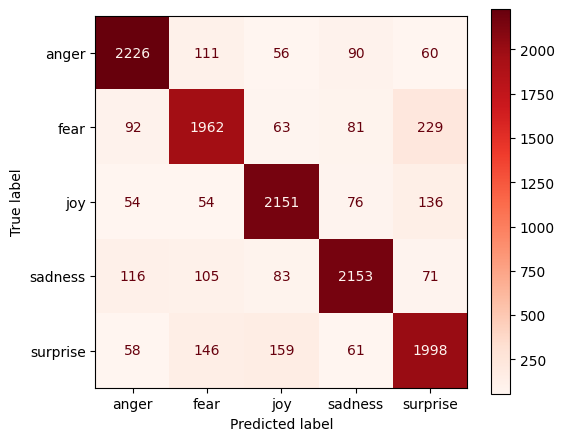

In [ ]:
cm_display_mnb = ConfusionMatrixDisplay(mnb_cm, display_labels=xmnb.classes_)
fig, ax = plt.subplots(figsize=(6,5))
cm_display_mnb.plot(ax=ax,cmap='Reds')

# **4. Decision tree classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)


dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_test, y_pred, average='macro')
dt_recal = recall_score(y_test, y_pred, average='macro')
dt_cm = confusion_matrix(y_test,y_pred)
dt_f1 = f1_score(y_test, y_pred, average='macro')

print('Accuracy:', '{0:.3f}'.format(dt_acc*100))
print('Precision:', '{0:.3f}'.format(dt_prec*100))
print('Recall:', '{0:.3f}'.format(dt_recal*100))
print('F1-score:', '{0:.3f}'.format(dt_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 85.280
Precision: 85.313
Recall: 85.230
F1-score: 85.252
              precision    recall  f1-score   support

       anger       0.86      0.89      0.87      2543
        fear       0.81      0.82      0.81      2427
         joy       0.90      0.86      0.88      2471
     sadness       0.89      0.86      0.88      2528
    surprise       0.81      0.83      0.82      2422

    accuracy                           0.85     12391
   macro avg       0.85      0.85      0.85     12391
weighted avg       0.85      0.85      0.85     12391



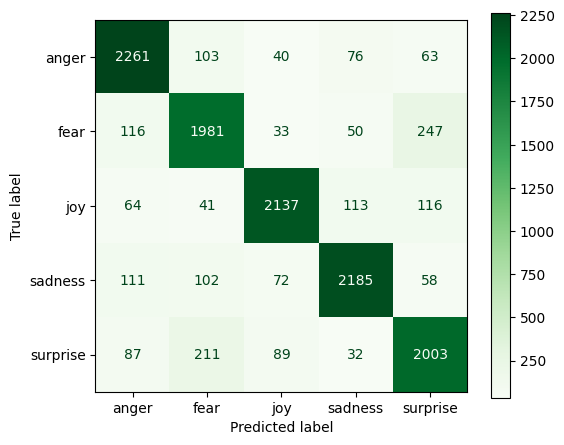

In [ ]:
# Display the confusion matrix
cm_display_dt = ConfusionMatrixDisplay(dt_cm, display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(6,5))
cm_display_dt.plot(ax=ax,cmap='Greens')

# **5. GradientBoostingClassifier**


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

gb_clf.fit(x_train, y_train)
y_pred = gb_clf.predict(x_test)


In [ ]:
gb_acc = accuracy_score(y_pred, y_test)
gb_prec = precision_score(y_test, y_pred, average='macro')
gb_recal = recall_score(y_test, y_pred, average='macro')
gb_cm = confusion_matrix(y_test,y_pred)
gb_f1 = f1_score(y_test, y_pred, average='macro')


print('Accuracy:', '{0:.3f}'.format(gb_acc*100))
print('Precision:', '{0:.3f}'.format(gb_prec*100))
print('Recall:', '{0:.3f}'.format(gb_recal*100))
print('F1-score:', '{0:.3f}'.format(gb_f1*100))
print(classification_report(y_test,y_pred))

Accuracy: 87.208
Precision: 88.227
Recall: 87.244
F1-score: 87.318
              precision    recall  f1-score   support

       anger       0.94      0.88      0.91      2543
        fear       0.90      0.83      0.86      2427
         joy       0.90      0.89      0.89      2471
     sadness       0.94      0.82      0.88      2528
    surprise       0.73      0.95      0.83      2422

    accuracy                           0.87     12391
   macro avg       0.88      0.87      0.87     12391
weighted avg       0.88      0.87      0.87     12391



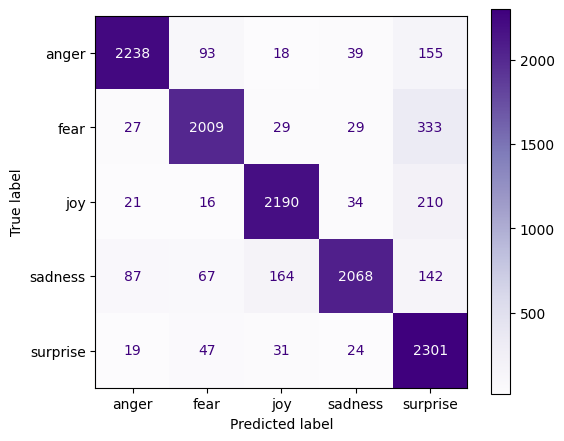

In [ ]:
gb_cm= confusion_matrix(y_test,y_pred)
cm_display_dt = ConfusionMatrixDisplay(gb_cm, display_labels=dt.classes_)
fig, ax = plt.subplots(figsize=(6,5))
cm_display_dt.plot(ax=ax,cmap='Purples')

# **Summary Visualization**

In [ ]:
def get_prec_recall_per_emotion(cm):
    per_emotion_precision = []
    for i in range(len(cm)):
        count_per_emotion,accurate = 0,0
        for j in range(len(cm)):
            if i == j:
                accurate = cm[j][i]
            count_per_emotion += cm[j][i]
        per_emotion_precision.append(round((accurate/count_per_emotion)*100,3))

    per_emotion_recall = []
    for i in range(len(cm)):
        count_per_emotion,accurate = 0,0
        for j in range(len(cm)):
            if i == j:
                accurate = cm[i][j]
            count_per_emotion += cm[i][j]
        per_emotion_recall.append(round((accurate/count_per_emotion)*100,3))

    return per_emotion_precision, per_emotion_recall

# **5.1 - Precision of all models**

In [ ]:
svm_per_prec,svm_per_recall = get_prec_recall_per_emotion(svm_cm)
lr_per_prec,lr_per_recall = get_prec_recall_per_emotion(lr_cm)
gb_per_prec,xgbc_per_recall = get_prec_recall_per_emotion(gb_cm)
mnb_per_prec,mnb_per_recall = get_prec_recall_per_emotion(mnb_cm)
dt_per_prec,dt_per_recall = get_prec_recall_per_emotion(dt_cm)

per_precision_list = pd.DataFrame({'Support vector Machine' : svm_per_prec,
                                'Logistic Regression' : lr_per_prec,
                                'GradientBoostingClassifier' : gb_per_prec,
                                'Naive Bayes' : mnb_per_prec,
                                'Decision Tree' : dt_per_prec},
                                index=svm.classes_)
per_precision_list

,Support vector Machine,Logistic Regression,GradientBoostingClassifier,Naive Bayes,Decision Tree
anger,92.201,90.686,93.562,87.431,85.676
fear,89.388,88.499,90.009,82.506,81.255
joy,88.265,89.130,90.049,85.629,90.131
sadness,90.360,90.631,94.257,87.485,88.966
surprise,83.575,82.478,73.257,80.112,80.539


# **Recall of all models**

In [ ]:
per_recall_list = pd.DataFrame({'Support vector Machine' : svm_per_recall,
                                'Logistic Regression' : lr_per_recall,
                                'GradientBoostingClassifier' : gb_recal,
                                'Naive Bayes' : mnb_per_recall,
                                'Decision Tree' : dt_per_recall},
                                index=svm.classes_)
per_recall_list

,Support vector Machine,Logistic Regression,GradientBoostingClassifier,Naive Bayes,Decision Tree
anger,89.265,89.972,0.872439,87.534,88.911
fear,83.642,82.118,0.872439,80.841,81.623
joy,91.623,91.259,0.872439,87.050,86.483
sadness,88.252,88.014,0.872439,85.166,86.432
surprise,90.545,89.595,0.872439,82.494,82.700


##**A ccuracy of all the models**



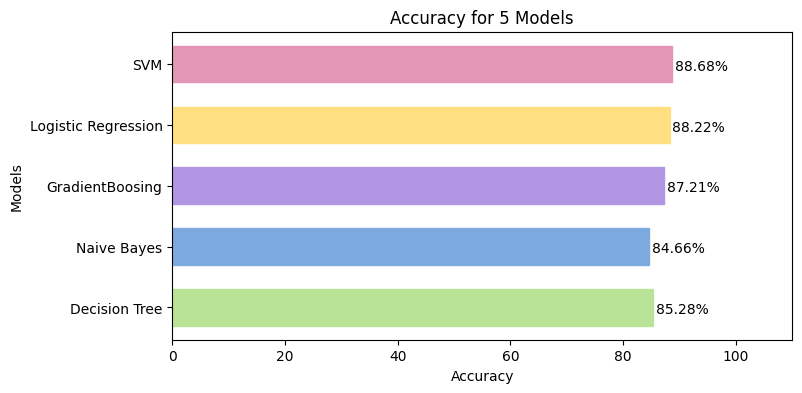

In [ ]:
algorithms = ['SVM','Logistic Regression','BradientBoosting','Naive Bayes','Decision Tree']
algorithm_acc = [svm_acc*100, lr_acc*100, gb_acc*100, mnb_acc*100, dt_acc*100]

algorithms = ['Decision Tree','Naive Bayes','GradientBoosing','Logistic Regression','SVM']
algorithm_acc = [dt_acc*100, mnb_acc*100, gb_acc*100, lr_acc*100, svm_acc*100]
# Figure Size
fig = plt.figure(figsize =(8, 4))
bar_list = plt.barh(algorithms, algorithm_acc,height = 0.6,color='black')

bar_list[4].set_color('#E396B6')
bar_list[3].set_color('#FFDF80')
bar_list[2].set_color('#B096E3')
bar_list[1].set_color('#7CAADE')
bar_list[0].set_color('#B9E396')
plt.xlabel('Accuracy',color='black')
plt.ylabel('Models',color='black')
plt.title('Accuracy for 5 Models')
plt.xlim(0,110)

for i, v in enumerate(algorithm_acc):
    plt.text(v + 0.5, i - 0.1, str(round(v,2))+'%', color='black',fontsize=10)

plt.show()

# **Predection**
So here the last part where we can test our model on a new dataset
go ahead :)

In [ ]:
# test
import pickle
pickle.dump(lr, open('model.pkl', 'wb'))
pickle.dump(TF_IDF, open('vectorizer.pkl', 'wb'))


In [ ]:

model = pickle.load(open('model.pkl', 'rb'))
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))

In [ ]:
# List of sentences with mixed emotions for emotion detec
test =[
          #  "It’s hard to believe that my childhood home is gone. The house where I grew up was torn down today, and I feel a deep sense of loss.",
#         "I lost my best friend last year, and it still hurts every time I think about them. The pain doesn't seem to go away.",
#         "I watched my favorite pet get older and weaker, and the thought of saying goodbye fills me with so much sadness."

          # "I can't believe how unfair my colleague was during the meeting today. They took credit for all the work I did, and it made me furious.",
          # "I’ve been waiting for over an hour at the restaurant, and no one has even acknowledged me yet. I'm so angry!",
          #  "The way they treated me in that argument was completely disrespectful, and I can’t help but feel enraged by their behavior."

          # "I have a big presentation tomorrow, and I’m terrified I’ll mess it up in front of everyone. I can't stop thinking about it.",
          # "The storm outside is getting worse, and the loud thunder is making me anxious. I keep checking the weather forecast for updates.",
          # "I have to go to the dentist today, and I’m absolutely dreading it. The thought of the drill makes me feel nauseous."

        # "I just received a promotion at work! I can't believe it, I'm so happy and excited to start this new chapter in my career.",
        # "My friends and I spent the whole day at the beach, laughing and playing games. I haven't felt this carefree in a long time.",
        # "I’m so proud of myself for finishing that marathon! After months of training, I finally reached my goal, and I feel incredible.",
       "i am not happy today",


]

for sentence in test:
    cleaned = handle_negations(sentence)
    vectorized = TF_IDF.transform([cleaned])
    prediction = lr.predict(vectorized)[0]
    # final_prediction = post_process(cleaned, prediction)
    print(f"Sentence: {sentence} -> Prediction: {prediction}")


Sentence: i am not happy today -> Prediction: sadness
Sentence: the darkness is so scary -> Prediction: fear
